In [1]:
import json
import pickle
import pdb
import sys
import cv2
sys.path.append('../../../virtualhome/simulation')
import cv2
from unity_simulator import comm_unity
from matplotlib import pyplot as plt
import numpy as np

In [51]:
comm = comm_unity.UnityCommunication(port="8079")
comm.reset(2)
cam_id = 86
s, image = comm.camera_image([cam_id], mode='normal')
s, image2 = comm.camera_image([cam_id], mode='seg_class')
cv2.imwrite('image.png', image[0])
cv2.imwrite('image_seg.png', image2[0])

True

In [52]:
file_name = '../../../record/init7_read_book_1_full/logs_agent_2_read_book.json'
with open(file_name, 'r') as f:
    content = json.load(f)

In [106]:
aux = cv2.imread('image_seg.png')[:, :, ::-1]
aux_sum = np.sum(aux, 2)
aux2 = cv2.imread('image.png')[:, :, ::-1]

In [98]:
aux_index = (aux2[:, :, 0].astype(np.float32)*256.0*256.0 + 
             aux2[:, :, 1].astype(np.float32)*256.0 + aux2[:, :, 2].astype(np.float32))


In [78]:
aux_index.shape

(480, 640)

In [103]:
indi = np.logical_or(aux_index == aux_index[0,0], aux_sum == 0)
aux2[indi, :] *= 0 

In [145]:
alpha = ((aux_sum == 0)*0. + 120*(aux_sum > 0)).astype(np.uint8)[:, :, None]

In [146]:
#plt.imshow(alpha)

In [147]:
aux2_a = np.concatenate([aux2, alpha], 2)

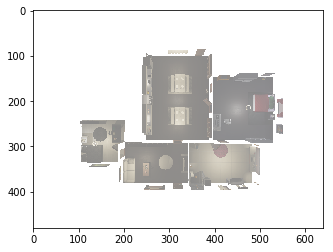

In [148]:
plt.imshow(aux2_a.astype(np.uint8))

In [172]:
def world2im(camera_data, wcoords):
    
    wcoords = wcoords.transpose()
    if len(wcoords.shape) < 2:
        return None
    proj = np.array(camera_data['projection_matrix']).reshape((4,4)).transpose()
    w2cam = np.array(camera_data['world_to_camera_matrix']).reshape((4,4)).transpose()
    cw = np.concatenate([wcoords, np.ones((1, wcoords.shape[1]))], 0) # 4 x N
    pixelcoords = np.matmul(proj, np.matmul(w2cam, cw)) # 4 x N
    pixelcoords = pixelcoords/pixelcoords[-1, :]
    pixelcoords = (pixelcoords + 1)/2.
    pixelcoords[1,:] = 1. - pixelcoords[1, :]
    return pixelcoords[:2, :]

positions = [('[walk] <kitchen> (11)', [-9.97799969, 0.0, -2.399999998736746e-07]),
 ('[walk] <kitchen> (11)', [-11.7392979, 0.776580632, -0.471640229]),
 ('[walk] <kitchen> (11)', [-11.5088167, 0.776580632, -1.4308517]),
 ('[walk] <kitchen> (11)', [-10.8416395, 0.776580632, -2.139731]),
 ('[walk] <kitchen> (11)', [-9.954054, 0.776580632, -2.565499]),
 ('[walk] <kitchen> (11)', [-8.966689, 0.776580632, -2.40703726]),
 ('[walk] <kitchen> (11)', [-7.979324, 0.776580632, -2.248575]),
 ('[walk] <kitchen> (11)', [-6.991961, 0.776580632, -2.09011245]),
 ('[walk] <kitchen> (11)', [-6.00459528, 0.776580632, -1.9316498]),
 ('[walk] <dishwasher> (161)', [-5.01723146, 0.77658087, -1.77318788]),
 ('[walk] <dishwasher> (161)', [-4.02986526, 0.776580632, -1.614726]),
 ('[walk] <dishwasher> (161)', [-4.023166, 0.776580632, -0.7288514]),
 ('[walk] <dishwasher> (161)', [-4.55741072, 0.7765807, 0.116476245]),
 ('[walk] <dishwasher> (161)', [-4.929114, 0.776580632, 1.02777159]),
 ('[walk] <dishwasher> (161)', [-5.135122, 0.776580632, 2.00631666]),
 ('[walk] <dishwasher> (161)', [-5.34113, 0.776580632, 2.98486185]),
 ('[open] <dishwasher> (161)', [-5.54713964, 0.776580632, 3.96341085]),
 ('[close] <dishwasher> (161)', [-5.88522863, 0.77811265, 5.588617]),
 ('[walk] <kitchencabinets> (141)', [-4.95739126, 0.775112152, 5.45957756]),
 ('[open] <kitchencabinets> (141)', [-5.82827234, 0.7765806, 5.854665]),
 ('[close] <kitchencabinets> (141)', [-6.356252, 0.779123247, 6.167266]),
 ('[walk] <kitchencabinets> (140)', [-5.687743, 0.777087569, 5.7604537]),
 ('[walk] <kitchencabinets> (140)', [-5.84381342, 0.776580632, 4.7472477]),
 ('[walk] <kitchencabinets> (140)', [-6.008162, 0.776580632, 3.76083517]),
 ('[open] <kitchencabinets> (140)', [-6.17251062, 0.776580632, 2.77442884]),
 ('[grab] <pudding> (415)', [-6.299374, 0.7792546, 1.85160613]),
 ('[close] <kitchencabinets> (140)', [-6.27169132, 0.776580632, 1.85993814]),
 ('[walk] <bedroom> (237)', [-5.646845, 0.7792705, 1.43463993]),
 ('[walk] <bedroom> (237)', [-5.0559907, 0.776580632, 0.6259436]),
 ('[walk] <bedroom> (237)', [-4.457156, 0.776580632, -0.174927756]),
 ('[walk] <bedroom> (237)', [-3.91500044, 0.776580632, -0.9946469]),
 ('[walk] <coffeetable> (211)', [-4.323223, 0.776580632, -1.66180658]),
 ('[walk] <coffeetable> (211)', [-5.22712135, 0.776580632, -2.087351]),
 ('[walk] <coffeetable> (211)', [-6.12901449, 0.776580632, -2.51930976]),
 ('[putback] <pudding> (415) <coffeetable> (211)',
  [-7.030908, 0.776580632, -2.95126748]),
 ('[walk] <kitchen> (11)', [-8.211254, 0.776580632, -4.456451]),
 ('[walk] <kitchen> (11)', [-8.027525, 0.776580632, -3.493555]),
 ('[walk] <kitchen> (11)', [-7.168174, 0.776580632, -3.044071]),
 ('[walk] <kitchen> (11)', [-6.25523663, 0.776580632, -2.635972]),
 ('[walk] <kitchen> (11)', [-5.342299, 0.776580632, -2.22787237]),
 ('[walk] <kitchen> (11)', [-4.429363, 0.776580632, -1.81977236]),
 ('[walk] <kitchencabinets> (140)', [-3.9150002, 0.776580632, -1.1427573]),
 ('[walk] <kitchencabinets> (140)', [-4.389401, 0.776580632, -0.309782565]),
 ('[walk] <kitchencabinets> (140)', [-5.01588535, 0.776580632, 0.4696454]),
 ('[open] <kitchencabinets> (140)', [-5.64236927, 0.776580632, 1.24907339]),
 ('[grab] <apple> (418)', [-6.16210938, 0.77653116, 1.91054118]),
 ('[close] <kitchencabinets> (140)', [-6.162103, 0.776580632, 1.910523]),
 ('[walk] <livingroom> (179)', [-5.57072449, 0.7765255, 1.468286]),
 ('[walk] <livingroom> (179)', [-5.029018, 0.776580632, 0.6700654]),
 ('[walk] <livingroom> (179)', [-4.450348, 0.776580632, -0.1454952]),
 ('[walk] <livingroom> (179)', [-3.9150002, 0.776580632, -0.974864364]),
 ('[walk] <coffeetable> (211)', [-4.207906, 0.776580632, -1.85373116]),
 ('[walk] <coffeetable> (211)', [-5.12864161, 0.776580632, -2.24003]),
 ('[walk] <coffeetable> (211)', [-6.053978, 0.776580632, -2.6191678]),
 ('[putback] <apple> (418) <coffeetable> (211)',
  [-6.97931671, 0.776580632, -2.9983027]),
 ('[walk] <kitchen> (11)', [-8.159797, 0.776580632, -4.56779432]),
 ('[walk] <kitchen> (11)', [-8.042683, 0.776580632, -3.594514]),
 ('[walk] <kitchen> (11)', [-7.26137, 0.776580632, -3.08573151]),
 ('[walk] <kitchen> (11)', [-6.34843349, 0.776580632, -2.67763281]),
 ('[walk] <kitchen> (11)', [-5.43549633, 0.776580632, -2.26953268]),
 ('[walk] <kitchen> (11)', [-4.52255964, 0.776580632, -1.86143363]),
 ('[walk] <juice> (413)', [-3.91499972, 0.776580632, -1.24484193]),
 ('[walk] <juice> (413)', [-4.265016, 0.776580632, -0.346178353]),
 ('[walk] <juice> (413)', [-4.79926, 0.776580632, 0.4991488]),
 ('[walk] <juice> (413)', [-4.876803, 0.776580632, 1.48977864]),
 ('[walk] <juice> (413)', [-4.929237, 0.776580632, 2.48839831]),
 ('[grab] <juice> (413)', [-4.98167324, 0.776580632, 3.48701978]),
 ('[walk] <livingroom> (179)', [-5.10581255, 0.776580453, 5.253637]),
 ('[walk] <livingroom> (179)', [-5.029603, 0.776580632, 4.28051424]),
 ('[walk] <livingroom> (179)', [-4.975498, 0.776580632, 3.28198218]),
 ('[walk] <livingroom> (179)', [-4.921392, 0.776580632, 2.283447]),
 ('[walk] <livingroom> (179)', [-4.867288, 0.776580632, 1.28491139]),
 ('[walk] <livingroom> (179)', [-4.6896925, 0.776580632, 0.325780451]),
 ('[walk] <coffeetable> (211)', [-4.155447, 0.776580632, -0.5195467]),
 ('[walk] <coffeetable> (211)', [-3.9150002, 0.776580632, -1.44993627]),
 ('[walk] <coffeetable> (211)', [-4.709799, 0.776580632, -1.94513345]),
 ('[putback] <juice> (413) <coffeetable> (211)',
  [-5.62273359, 0.776580632, -2.35323334]),
 ('[walk] <kitchen> (11)', [-8.324092, 0.776580632, -4.681371]),
 ('[walk] <kitchen> (11)', [-8.08441, 0.776580632, -3.724557]),
 ('[walk] <kitchen> (11)', [-7.385216, 0.776580632, -3.14109325]),
 ('[walk] <kitchen> (11)', [-6.47227955, 0.776580632, -2.73299432]),
 ('[walk] <kitchen> (11)', [-5.559342, 0.776580632, -2.324894]),
 ('[walk] <kitchen> (11)', [-4.646405, 0.776580632, -1.91679454]),
 ('[walk] <book> (410)', [-3.915, 0.776580632, -1.38049877]),
 ('[walk] <book> (410)', [-3.30055714, 0.776580632, -0.6008202]),
 ('[walk] <book> (410)', [-2.6115303, 0.776580751, 0.12391223]),
 ('[walk] <book> (410)', [-2.20010328, 0.7765806, 0.9644605]),
 ('[walk] <book> (410)', [-2.16973972, 0.776580632, 1.9639951]),
 ('[walk] <book> (410)', [-2.13937545, 0.776580632, 2.96352983]),
 ('[grab] <book> (410)', [-2.10901022, 0.776580632, 3.96306348]),
 ('[walk] <livingroom> (179)', [-2.10901117, 0.776580632, 3.96306157]),
 ('[walk] <livingroom> (179)', [-2.13795185, 0.776580632, 3.01041675]),
 ('[walk] <livingroom> (179)', [-2.16831613, 0.776580632, 2.01087737]),
 ('[walk] <livingroom> (179)', [-2.19868016, 0.7765806, 1.01133907]),
 ('[walk] <livingroom> (179)', [-2.57921815, 0.776580751, 0.157899961]),
 ('[walk] <livingroom> (179)', [-3.268246, 0.776580632, -0.566833854]),
 ('[walk] <livingroom> (179)', [-3.82803035, 0.776580632, -1.38254571]),
 ('[walk] <sofa> (210)', [-4.489161, 0.776580632, -2.11774683]),
 ('[walk] <sofa> (210)', [-5.422917, 0.776580632, -2.47052073]),
 ('[walk] <sofa> (210)', [-6.361589, 0.776580632, -2.81532717]),
 ('[walk] <sofa> (210)', [-7.30026, 0.776580632, -3.1601336]),
 ('[walk] <sofa> (210)', [-8.090173, 0.776580632, -3.648756]),
 ('[sit] <sofa> (210)', [-8.264629, 0.776580632, -4.238734])]

cam_data = {'index': 86,
   'name': 'Room_Camera_PRE_HOM_Home_03_',
   'projection_matrix': [1.299038,
    0.0,
    0.0,
    0.0,
    0.0,
    1.73205078,
    0.0,
    0.0,
    0.0,
    0.0,
    -1.48803532,
    -1.0,
    0.0,
    0.0,
    -48.803524,
    0.0],
   'world_to_camera_matrix': [1.0,
    0.0,
    0.0,
    0.0,
    0.0,
    -1.1920929e-07,
    1.00000012,
    0.0,
    0.0,
    1.00000012,
    1.1920929e-07,
    0.0,
    3.71034622,
    -1.31489742,
    -22.0215664,
    1.0]}

In [173]:
im_positions = [(x[0], world2im(cam_data, np.array(x[1])[None, :])) for x in positions]

In [174]:
x = np.array([(pos[1][0])*640 for pos in im_positions]).squeeze(-1)
y = np.array([(pos[1][1])*480 for pos in im_positions]).squeeze(-1)

(-0.5, 639.5, 479.5, -0.5)

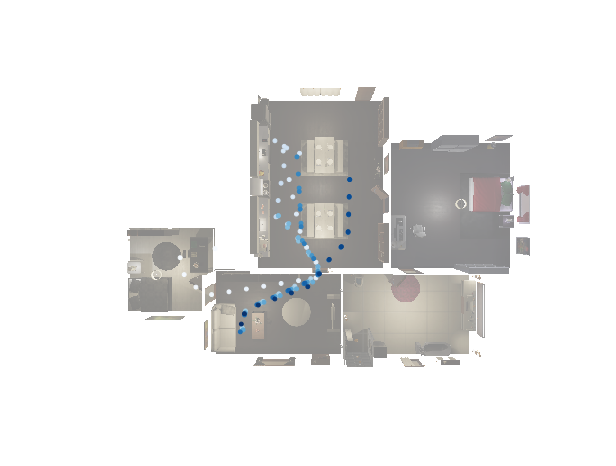

In [175]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([1,1,1,1])
ax.imshow(aux2_a.astype(np.uint8))
c = np.arange(len(positions))
ax.scatter(x,y,c=c, s=15.0, cmap='Blues')
plt.axis('off')

In [176]:
fig.savefig('foo.png')

<Figure size 432x288 with 0 Axes>